In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [26]:
jobs_translated = pd.read_csv('dashboard/jobs_translated.csv')

In [27]:
jobs_translated.columns

Index(['Position', 'County City', 'Region', 'Company Name', 'Vacancy Name',
       'Job Category', 'Job Benefits', 'Work Nature', 'Working Location',
       'Management Responsibilities', 'Working Hours',
       'Number of People Required', 'Working Experience',
       'Education Requirements', 'Department requirements',
       'Proficiency in tools', 'Work skills', 'Capital amount',
       'Number of employees', 'Company label'],
      dtype='object')

In [28]:
languages = pd.Series(
    [
        "JavaScript",
        "Python",
        "Java",
        "C",
        "C++",
        "C#",
        "R",
        "PHP",
        "TypeScript",
        "Swift",
        "Objective-C",
        "Rust",
        "Go",
        "Kotlin",
        "Matlab",
        "Ada",
        "Dart",
        "Ruby",
        "PowerShell",
        "VBA",
        "Assembly Language",
        "SQL",
        "HTML",
        "CSS",
        "Bash",
        "Perl",
        "Lua",
        "Scala",
        "Prolog",
        "D",
        "PL/SQL",
        "Transact-SQL",
        "Haskell",
        "Logo",
        "FoxPro",
        "Delphi/Object Pascal",
        "Julia",
        "Scratch",
        "SAS",
    ]
)

In [29]:
languages_pt = pd.DataFrame(columns=["Language", "Percentage"])
languages_pt["Language"] = languages

In [30]:
jobs_translated["Proficiency in tools"].value_counts()

Proficiency in tools
不拘                                   21200
C、C++贊助提升專業能力                          565
Excel、PowerPoint、Word贊助提升專業能力          450
Python贊助提升專業能力                         370
ASP.NET、C#贊助提升專業能力                     318
                                     ...  
MCU、C、C#、C++、FPGA贊助提升專業能力                1
MCU、C、C++、Bluetooth、RF贊助提升專業能力           1
MCU、C、C++、Java贊助提升專業能力                   1
EDA、FPGA、RTL、Verilog、VHDL贊助提升專業能力        1
Linux、Python、TCP/IP、IPS贊助提升專業能力          1
Name: count, Length: 9318, dtype: int64

In [31]:
jobs_translated['Proficiency in tools'] = jobs_translated['Proficiency in tools'].astype(str)

for language in languages_pt["Language"]:
    have_language = 0
    for posting in jobs_translated["Proficiency in tools"]:
        pattern = language.replace('+', '\\+').replace('/', '\\/')
        matches = re.findall(pattern, posting)
        if matches:    
            have_language += 1
    curr_pt = have_language / len(jobs_translated[jobs_translated["Proficiency in tools"] != '不拘']["Proficiency in tools"])
    languages_pt.loc[languages_pt['Language'] == language,'Percentage'] = float(curr_pt)

In [32]:
percentage_c = languages_pt.loc[languages_pt['Language'] == 'C++', 'Percentage'].iloc[0] + languages_pt.loc[languages_pt['Language'] == 'C#', 'Percentage'].iloc[0]
languages_pt.loc[languages_pt['Language'] == 'C', 'Percentage'] -= percentage_c

percentage_js = languages_pt.loc[languages_pt['Language'] == 'JavaScript', 'Percentage'].iloc[0]
languages_pt.loc[languages_pt['Language'] == 'Java', 'Percentage'] -= percentage_js

In [33]:
languages_pt

,Language,Percentage
0,JavaScript,0.242691
1,Python,0.177166
2,Java,0.122158
3,C,0.162469
4,C++,0.183742
5,C#,0.216785
6,R,0.089675
7,PHP,0.076575
8,TypeScript,0.0
9,Swift,0.0


C:\Users\faust\AppData\Local\Temp\ipykernel_23668\783973594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Language", x='PercentageString', data=languages_pt_nonzero, color = 'gray', orient = 'h', palette=colors)


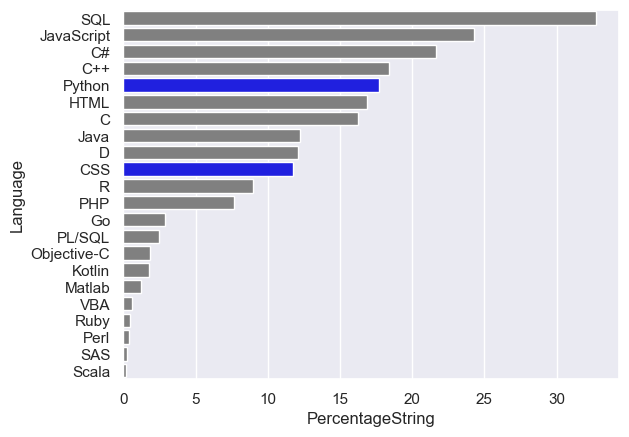

In [40]:
languages_pt_nonzero = languages_pt.loc[languages_pt['Percentage'] > 0.001].sort_values(by="Percentage", ascending=False)
languages_pt_nonzero['PercentageString'] = languages_pt_nonzero['Percentage'] * 100 

selected = ['Python', 'CSS']
sns.set_theme()
colors = ['blue' if lang in selected else 'gray' for lang in languages_pt_nonzero['Language']]
sns.barplot(y="Language", x='PercentageString', data=languages_pt_nonzero, color = 'gray', orient = 'h', palette=colors)
plt.show()

In [41]:
languages_pt_nonzero.to_csv('dashboard/languages.csv', index=False)